# Venezuela Economic Analysis: Natural Resource Dependency & Macroeconomic Evolution
#### World Bank indicators on oil dependence, resource rents, exports, and GDP
# About Dataset
# Venezuela Economic & Natural Resource Indicators Dataset
**Bismillah!** Assalam-o-Alaikum and welcome to this comprehensive EDA guide. Today we'll explore the Untapped natural resorces of Venezuela dataset with the same enthusiasm as hunting for the perfect diamond for your sister's wedding!
###### This dataset contains long-term economic and natural resource indicators for Venezuela, sourced from the World Bank World Development Indicators (WDI).

## Focus Areas
The dataset captures key aspects of Venezuela's economy:

Oil dependency and natural resource rents – tracking the country's reliance on extractive industries
Fuel and mineral export dependence – measuring the composition and vulnerability of export revenues
GDP levels and economic growth trends – documenting long-term economic performance and fluctuations
# Use Cases
This dataset is designed for:

**Target Audience:** Data scientists, analysts, and students from Karachi to Khyber Pakhtunkhwa.
**Prerequisites:** Basic Python knowledge and a cup of chai (highly recommended).

**References:**
- GitHub: github.com/ashrafkhetran
- Kaggle: kaggle.com/ashrafkhetran

Chalo shuru karte hain! (Let's begin!)

#### Exploratory Data Analysis (EDA)
#### Economic research and policy analysis
#### Data science projects and modeling
#### Kaggle notebooks and visual storytelling
# Data Quality & Coverage
All indicators are official, publicly available, and suitable for academic and professional use. Time coverage spans from 1960 to 2023, providing over six decades of historical data for trend analysis and forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings

In [2]:
plt.style.use("fivethirtyeight")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (16,6)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/venezuela-resource-dependency-and-economy1960-2023/venezuela_wdi_indicators.csv")

## **📊 About the Dataset**

This dataset represents **Venezuela’s long-term economic and natural resource profile** using annual time-series data. It is designed to explore how **natural resource dependency—especially oil—has interacted with economic growth and trade structure over time**.

The dataset spans **65 years**, making it ideal for **exploratory data analysis (EDA)** focused on long-term trends rather than short-term forecasting.

### **Key Highlights**
-  **Oil and natural resource rents (% of GDP)**
-  **Export composition**, including fuel and ores & metals
-  **GDP (current USD)** to capture economic scale
-  **GDP growth rate (%)** to analyze expansion and contraction cycles

Each row corresponds to **one year**, enabling analysis of:
- Economic stability vs. volatility
- Resource dependency patterns
- Export concentration and diversification trends

Overall, this dataset is well-suited for **historical, structural, and policy-oriented EDA** of a resource-dependent economy.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country_iso3                               65 non-null     object 
 1   year                                       65 non-null     int64  
 2   oil_rents_pct_gdp                          45 non-null     float64
 3   total_natural_resource_rents_pct_gdp       45 non-null     float64
 4   fuel_exports_pct_merch_exports             49 non-null     float64
 5   ores_and_metals_exports_pct_merch_exports  49 non-null     float64
 6   gdp_current_usd                            65 non-null     float64
 7   gdp_growth_pct                             64 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.2+ KB


In [5]:
df.isnull().sum()

country_iso3                                  0
year                                          0
oil_rents_pct_gdp                            20
total_natural_resource_rents_pct_gdp         20
fuel_exports_pct_merch_exports               16
ores_and_metals_exports_pct_merch_exports    16
gdp_current_usd                               0
gdp_growth_pct                                1
dtype: int64

## **🧹 Handling Missing Values (EDA-Focused Approach)**

Since this study is **purely exploratory** and based on **single-country time-series data**, missing values were handled using a **context-aware and economically meaningful strategy**.

### **🧠 Key Considerations**
- ⏳ The dataset follows a **year-by-year timeline**, so preserving **temporal continuity** was essential.
- 📉 Most missing values arise from **historical reporting gaps**, particularly in earlier years.
- ❌ Aggressive techniques such as mean filling or regression imputation were avoided, as they can **introduce artificial economic behavior**.

### **✅ Approach Used**
- **Linear interpolation** was applied to the following time-series indicators:
  - Oil rents (% of GDP)
  - Total natural resource rents (% of GDP)
  - Fuel exports (% of merchandise exports)
  - Ores and metals exports (% of merchandise exports)
  - GDP growth rate (%)

  This ensures **smooth and realistic transitions between years** while preserving long-term trends.

- 📌 No new or synthetic data was introduced—interpolation only fills gaps **between observed values**.
- 📊 Variables with complete data, such as GDP in current USD, were left unchanged.

### **✨ Why This Approach is Suitable for EDA**
- Maintains the **true historical structure** of the data
- Allows consistent **visualization and trend analysis**
- Ensures **transparency and interpretability**

> 📝 *This missing-value strategy supports honest and reliable exploratory analysis, aligning with the goal of understanding long-term economic patterns rather than making predictions.*


In [6]:
# =================================================
# Missing Value Handling (Final – EDA Only Strategy)
# =================================================

# Keep original data untouched
df_clean = df.copy()

# Ensure correct ordering for time-series operations
df_clean = df_clean.sort_values('year').reset_index(drop=True)

# -----------------------------
# Columns suitable for interpolation
# -----------------------------
ts_interp_cols = [
    'oil_rents_pct_gdp',
    'total_natural_resource_rents_pct_gdp',
    'fuel_exports_pct_merch_exports',
    'ores_and_metals_exports_pct_merch_exports',
    'gdp_growth_pct'
]

# Apply linear interpolation (time-series aware)
for col in ts_interp_cols:
    df_clean[col] = df_clean[col].interpolate(
        method='linear',
        limit_direction='both'
    )

# -----------------------------
# Final Validation
# -----------------------------
print("Missing values after EDA-safe cleaning:\n")
print(df_clean.isnull().sum())


Missing values after EDA-safe cleaning:

country_iso3                                 0
year                                         0
oil_rents_pct_gdp                            0
total_natural_resource_rents_pct_gdp         0
fuel_exports_pct_merch_exports               0
ores_and_metals_exports_pct_merch_exports    0
gdp_current_usd                              0
gdp_growth_pct                               0
dtype: int64


In [7]:
df_clean.head()

,country_iso3,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
0,VEN,1960,4.799272,5.487721,92.362928,0.180690,7.663938e+09,3.192519
1,VEN,1961,4.799272,5.487721,92.362928,0.180690,8.067267e+09,3.192519
2,VEN,1962,4.799272,5.487721,92.362928,0.180690,8.814310e+09,8.532934
3,VEN,1963,4.799272,5.487721,92.911190,3.766721,9.608717e+09,3.900951
4,VEN,1964,4.799272,5.487721,91.099545,5.871650,8.192414e+09,11.129345


In [8]:
df_clean.describe()

,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
count,65.00000,65.000000,65.000000,65.000000,65.000000,6.500000e+01,65.000000
mean,1992.00000,14.809035,15.512457,89.794053,3.342070,9.049747e+10,0.845895
std,18.90767,7.784588,7.891246,7.531059,2.216902,9.192008e+10,8.695956
min,1960.00000,4.799272,5.487721,67.196607,0.046018,7.663938e+09,-29.998570
25%,1976.00000,9.958477,10.541667,83.419834,0.891443,3.141953e+10,-1.288321
50%,1992.00000,14.555955,15.136321,92.611057,3.766721,6.051612e+10,2.896258
75%,2008.00000,20.001157,20.576130,94.987026,5.021952,1.124514e+11,6.079808
max,2024.00000,35.900591,36.481381,98.763731,7.699365,3.931924e+11,18.286607


# **1️⃣ Long-Term Economic Trajectory (1960–2023)**

In [9]:
df_plot = df_clean.copy()

### **1️⃣ Yearly GDP Growth (Line + Negative Growth Highlight)**

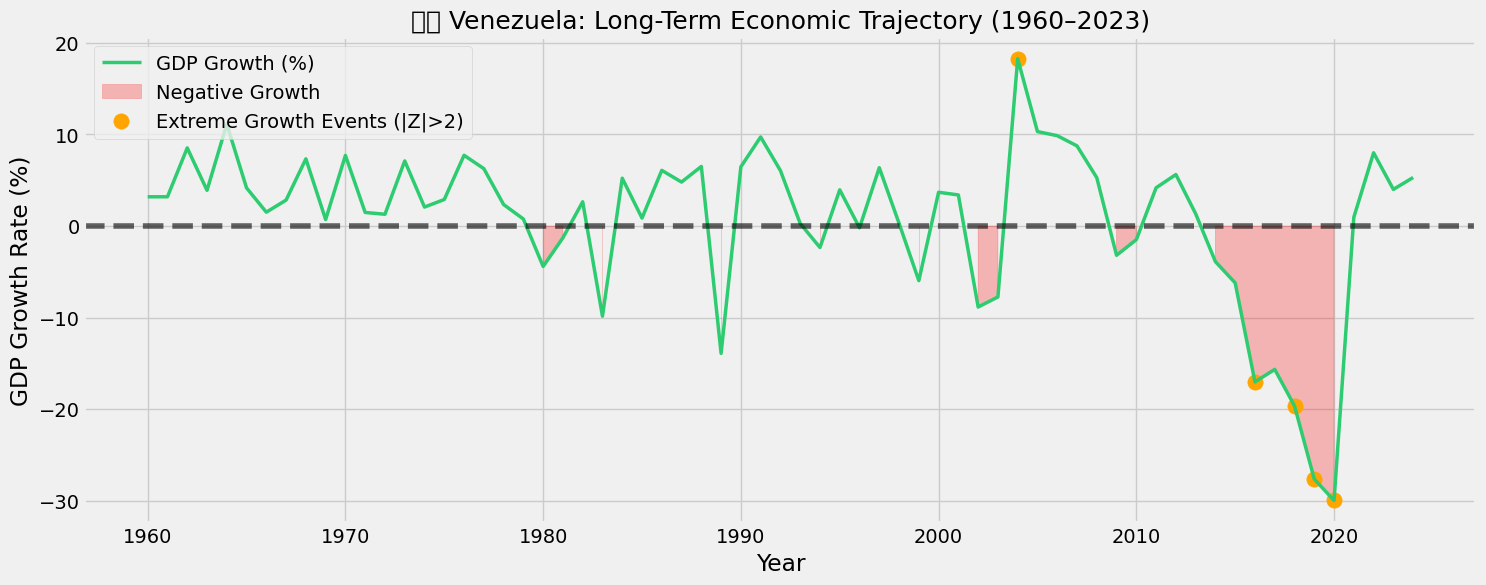

In [10]:
# Identify negative growth years
df_plot['negative_growth'] = df_plot['gdp_growth_pct'] < 0

# Optional: Z-score for extreme growth events
df_plot['growth_z'] = zscore(df_plot['gdp_growth_pct'].dropna())
df_plot['anomaly'] = df_plot['growth_z'].abs() > 2

# ------------------------
# Plot
# ------------------------
fig, ax = plt.subplots(figsize=(16,6))

# Line plot for GDP growth
sns.lineplot(
    x='year', y='gdp_growth_pct',
    data=df_plot, ax=ax,
    color='#2ecc71', lw=2.5, label='GDP Growth (%)'
)

# Highlight negative growth years
ax.fill_between(
    df_plot['year'],
    df_plot['gdp_growth_pct'],
    0,
    where=df_plot['negative_growth'],
    color='red', alpha=0.25,
    label='Negative Growth'
)

# Highlight extreme growth anomalies
ax.scatter(
    df_plot['year'][df_plot['anomaly']],
    df_plot['gdp_growth_pct'][df_plot['anomaly']],
    color='orange', s=120, label='Extreme Growth Events (|Z|>2)'
)

# Axes and title
ax.axhline(0, color='black', linestyle='--', alpha=0.6)
ax.set_title("🇻🇪 Venezuela: Long-Term Economic Trajectory (1960–2023)", fontsize=18)
ax.set_ylabel("GDP Growth Rate (%)")
ax.set_xlabel("Year")
ax.legend(loc='upper left')

plt.show()

### **2️⃣ Rolling 5-Year Volatility of GDP Growth**

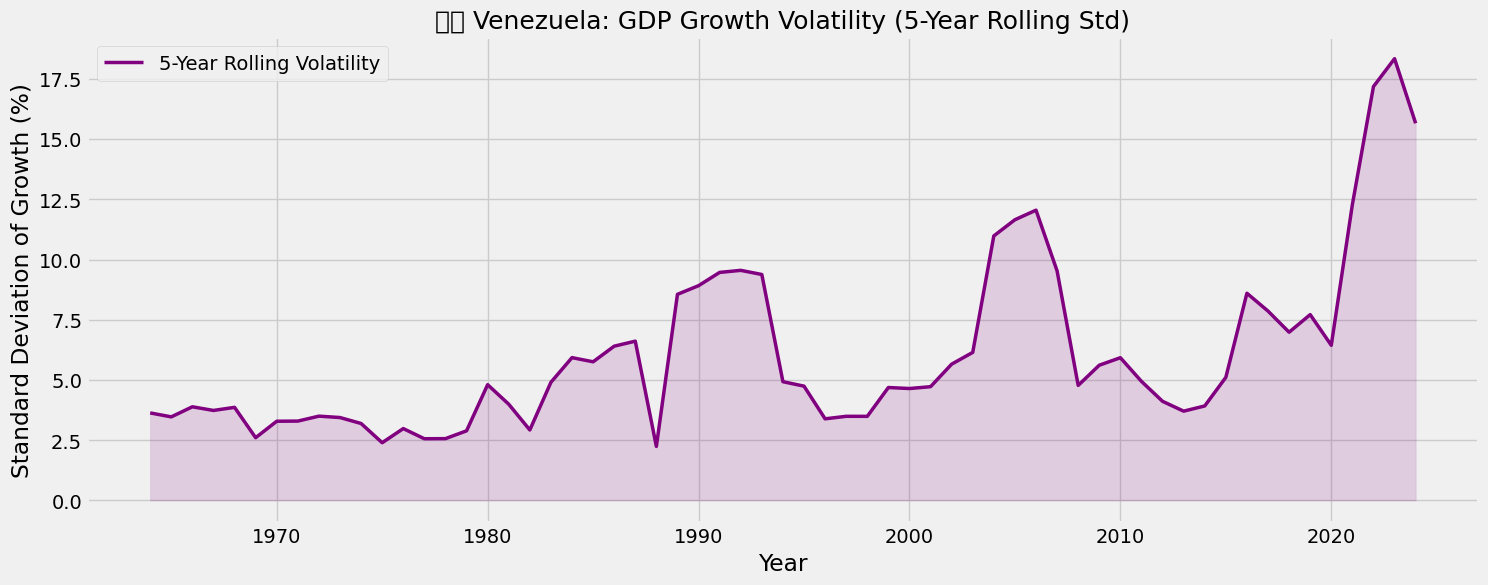

In [11]:
# Rolling volatility plot
df_plot['volatility_5y'] = df_plot['gdp_growth_pct'].rolling(window=5).std()

plt.figure(figsize=(16,6))
plt.plot(df_plot['year'], df_plot['volatility_5y'], color='purple', lw=2.5, label='5-Year Rolling Volatility')
plt.fill_between(df_plot['year'], df_plot['volatility_5y'], color='purple', alpha=0.15)
plt.title("🇻🇪 Venezuela: GDP Growth Volatility (5-Year Rolling Std)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Growth (%)")
plt.legend()
plt.show()

### **3️⃣ GDP Growth + Extreme Growth Events (Black Swan Overlay)**

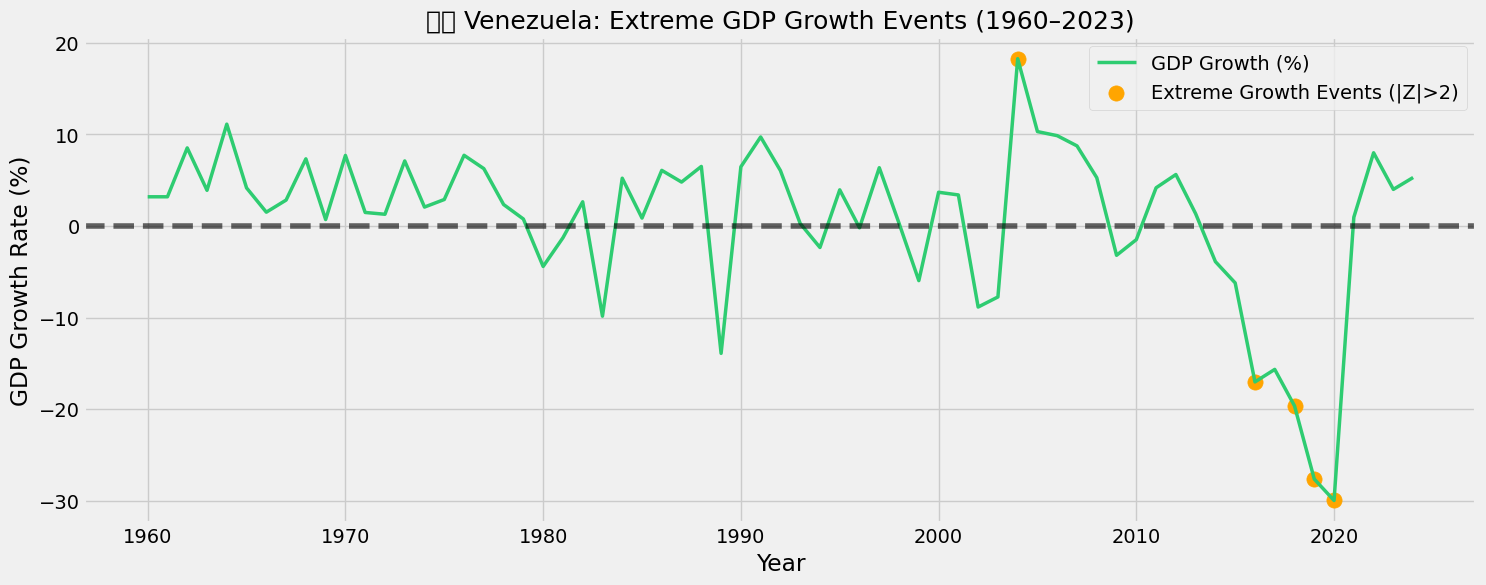

In [12]:
plt.figure(figsize=(16,6))
plt.plot(df_plot['year'], df_plot['gdp_growth_pct'], color='#2ecc71', lw=2.5, label='GDP Growth (%)')
plt.scatter(df_plot['year'][df_plot['anomaly']], df_plot['gdp_growth_pct'][df_plot['anomaly']], color='orange', s=120, label='Extreme Growth Events (|Z|>2)')
plt.axhline(0, color='black', linestyle='--', alpha=0.6)
plt.title("🇻🇪 Venezuela: Extreme GDP Growth Events (1960–2023)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.legend()
plt.show()

# **2️⃣ Extreme Oil Dependency (Rentier State Evidence)**

### **1️⃣ Oil Rents vs Other Natural Resource Rents (% of GDP)**

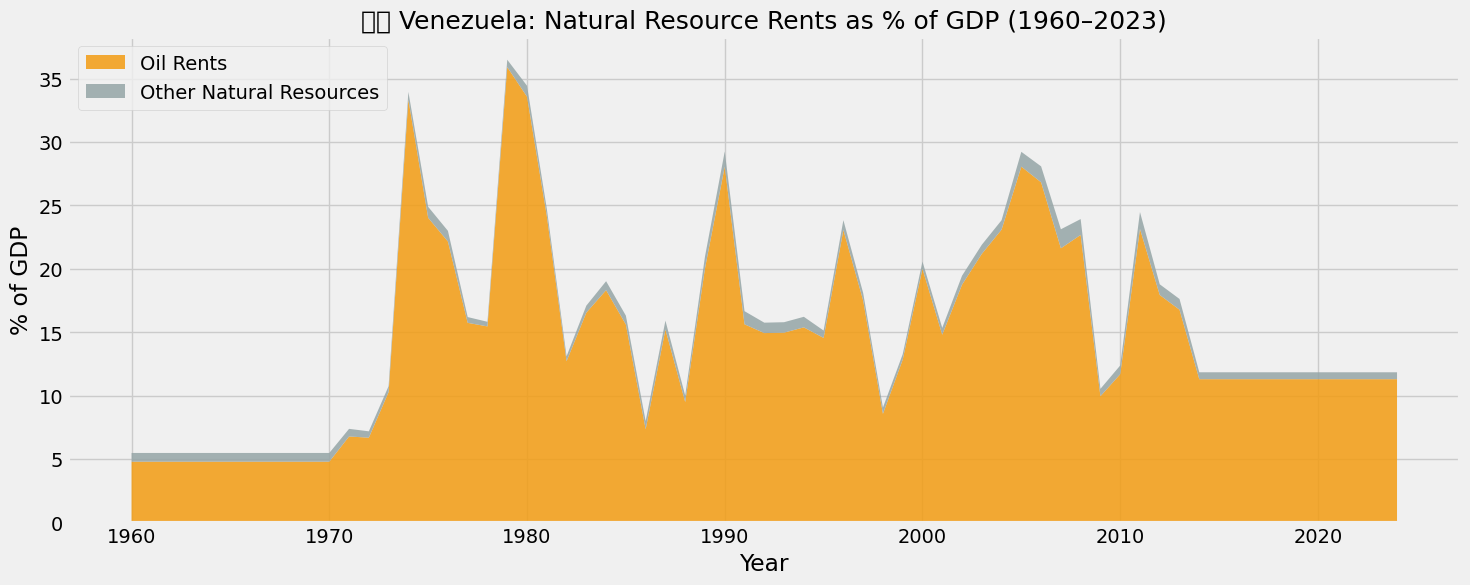

In [13]:
# Stackplot for Oil vs Other Natural Resource Rents
plt.figure(figsize=(16,6))
plt.stackplot(
    df_clean['year'],
    df_clean['oil_rents_pct_gdp'],
    df_clean['total_natural_resource_rents_pct_gdp'] - df_clean['oil_rents_pct_gdp'],
    labels=['Oil Rents', 'Other Natural Resources'],
    colors=['#f39c12', '#95a5a6'],
    alpha=0.85
)
plt.title("🇻🇪 Venezuela: Natural Resource Rents as % of GDP (1960–2023)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("% of GDP")
plt.legend(loc='upper left')
plt.show()

### **2️⃣ Oil Rents vs GDP Growth (Dual-axis)**

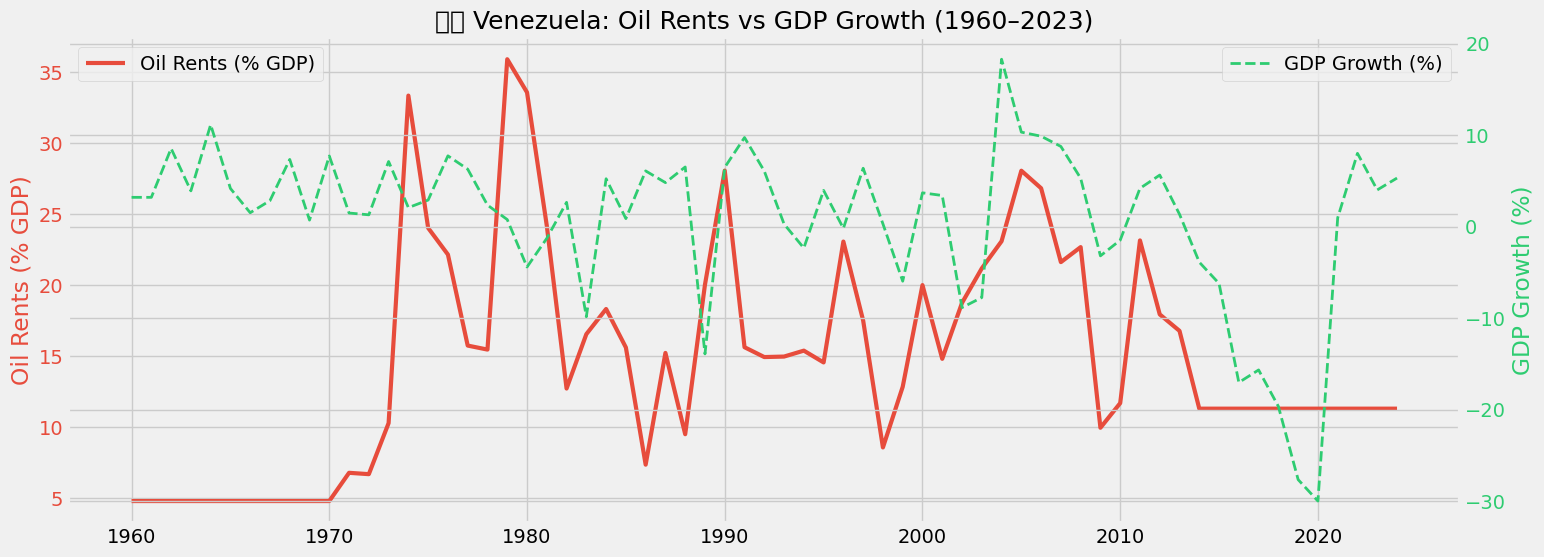

In [14]:
fig, ax1 = plt.subplots(figsize=(16,6))

# Oil rents
ax1.plot(df_clean['year'], df_clean['oil_rents_pct_gdp'], color='#e74c3c', lw=3, label='Oil Rents (% GDP)')
ax1.set_ylabel('Oil Rents (% GDP)', color='#e74c3c')
ax1.tick_params(axis='y', labelcolor='#e74c3c')

# GDP growth
ax2 = ax1.twinx()
ax2.plot(df_clean['year'], df_clean['gdp_growth_pct'], color='#2ecc71', lw=2, linestyle='--', label='GDP Growth (%)')
ax2.set_ylabel('GDP Growth (%)', color='#2ecc71')
ax2.tick_params(axis='y', labelcolor='#2ecc71')

# Title and legend
plt.title("🇻🇪 Venezuela: Oil Rents vs GDP Growth (1960–2023)", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### **3️⃣ Oil Share of Total Natural Resource Rents**

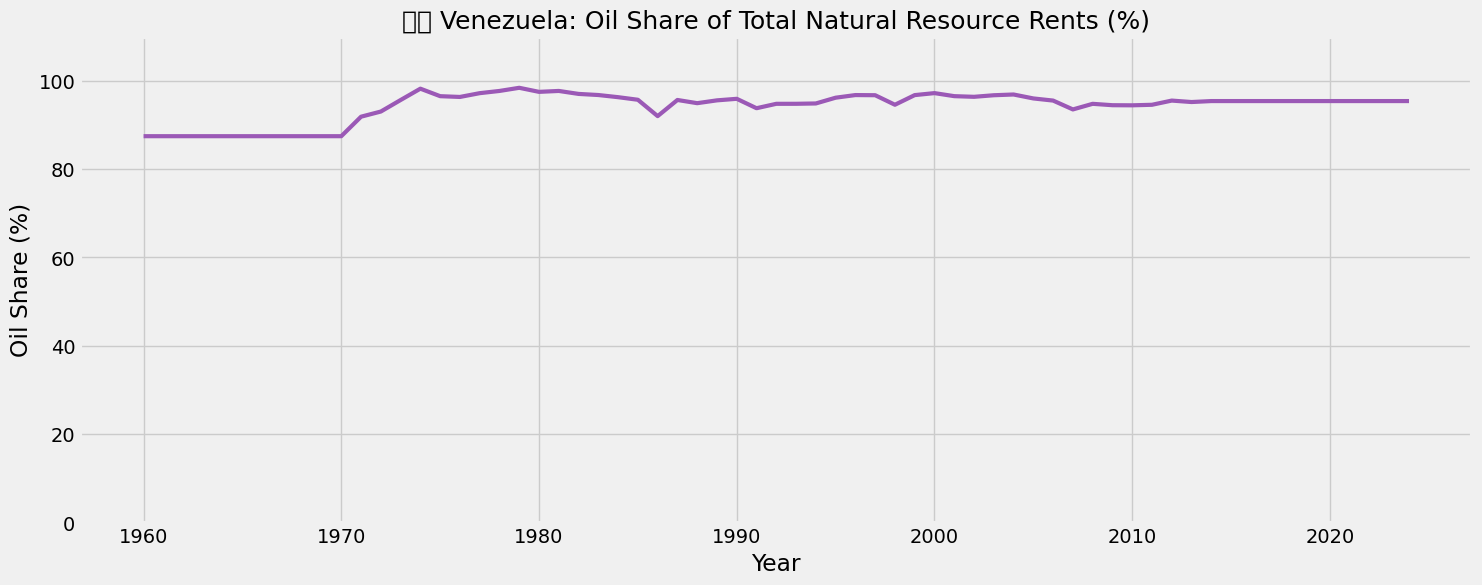

In [15]:
df_clean['oil_share_of_total'] = df_clean['oil_rents_pct_gdp'] / df_clean['total_natural_resource_rents_pct_gdp'] * 100

plt.figure(figsize=(16,6))
plt.plot(df_clean['year'], df_clean['oil_share_of_total'], color='#9b59b6', lw=3)
plt.title("🇻🇪 Venezuela: Oil Share of Total Natural Resource Rents (%)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Oil Share (%)")
plt.ylim(0, 110)
plt.show()

# **3️⃣ Resource Wealth vs Economic Stability Paradox**

### **1️⃣ Oil Rents vs GDP Growth (Scatter + Trend)**

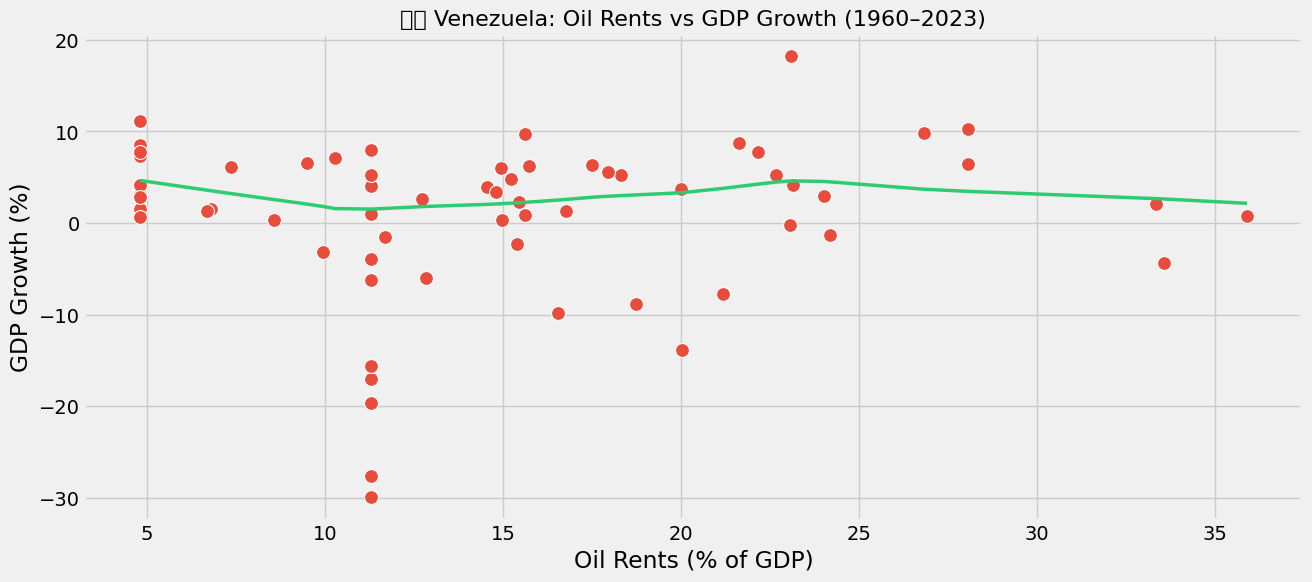

In [16]:
plt.figure(figsize=(14,6))
sns.scatterplot(
    x='oil_rents_pct_gdp', 
    y='gdp_growth_pct', 
    data=df_clean, 
    s=100, 
    color='#e74c3c'
)
sns.regplot(
    x='oil_rents_pct_gdp', 
    y='gdp_growth_pct', 
    data=df_clean, 
    scatter=False, 
    lowess=True, 
    line_kws={'color': '#2ecc71', 'linewidth': 2.5}
)
plt.title("🇻🇪 Venezuela: Oil Rents vs GDP Growth (1960–2023)", fontsize=16)
plt.xlabel("Oil Rents (% of GDP)")
plt.ylabel("GDP Growth (%)")
plt.show()

### **2️⃣ GDP Growth Over Time with Oil Rent Overlay**

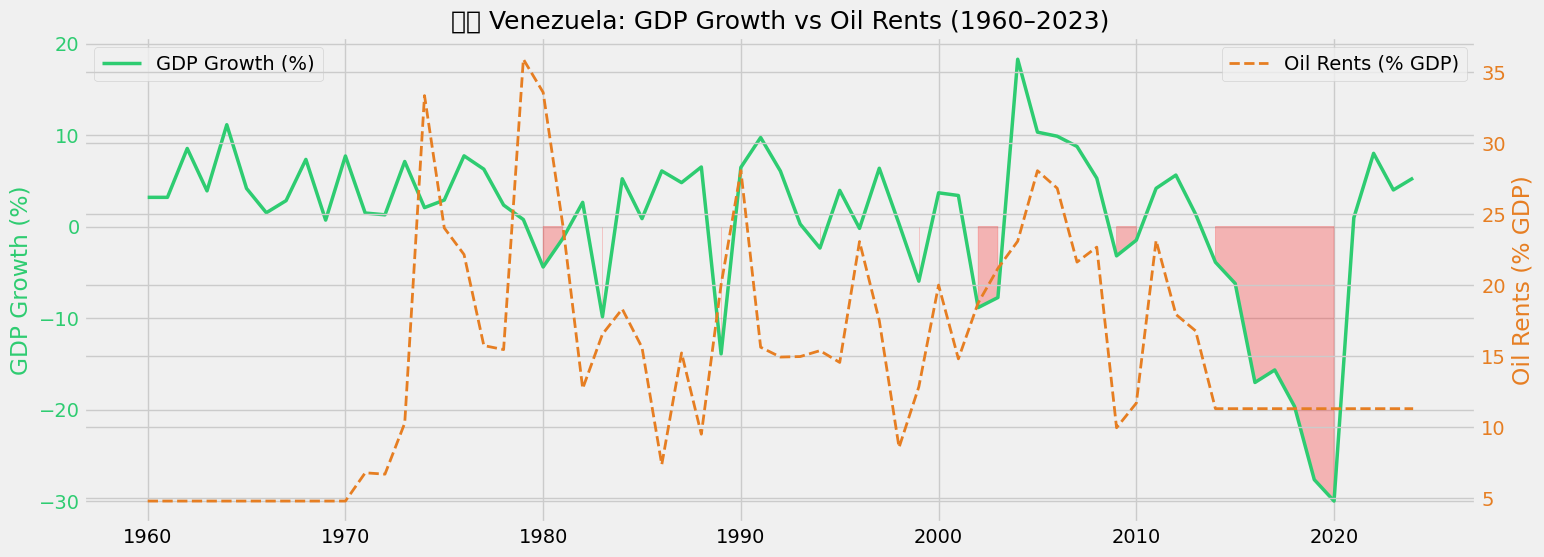

In [17]:
fig, ax1 = plt.subplots(figsize=(16,6))

# GDP growth
ax1.plot(df_clean['year'], df_clean['gdp_growth_pct'], color='#2ecc71', lw=2.5, label='GDP Growth (%)')
ax1.fill_between(df_clean['year'], df_clean['gdp_growth_pct'], 0, where=(df_clean['gdp_growth_pct'] < 0), color='red', alpha=0.25)
ax1.set_ylabel("GDP Growth (%)", color='#2ecc71')
ax1.tick_params(axis='y', labelcolor='#2ecc71')

# Oil rents
ax2 = ax1.twinx()
ax2.plot(df_clean['year'], df_clean['oil_rents_pct_gdp'], color='#e67e22', lw=2, linestyle='--', label='Oil Rents (% GDP)')
ax2.set_ylabel("Oil Rents (% GDP)", color='#e67e22')
ax2.tick_params(axis='y', labelcolor='#e67e22')

plt.title("🇻🇪 Venezuela: GDP Growth vs Oil Rents (1960–2023)", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### **3️⃣ Oil Rents vs Rolling GDP Volatility**

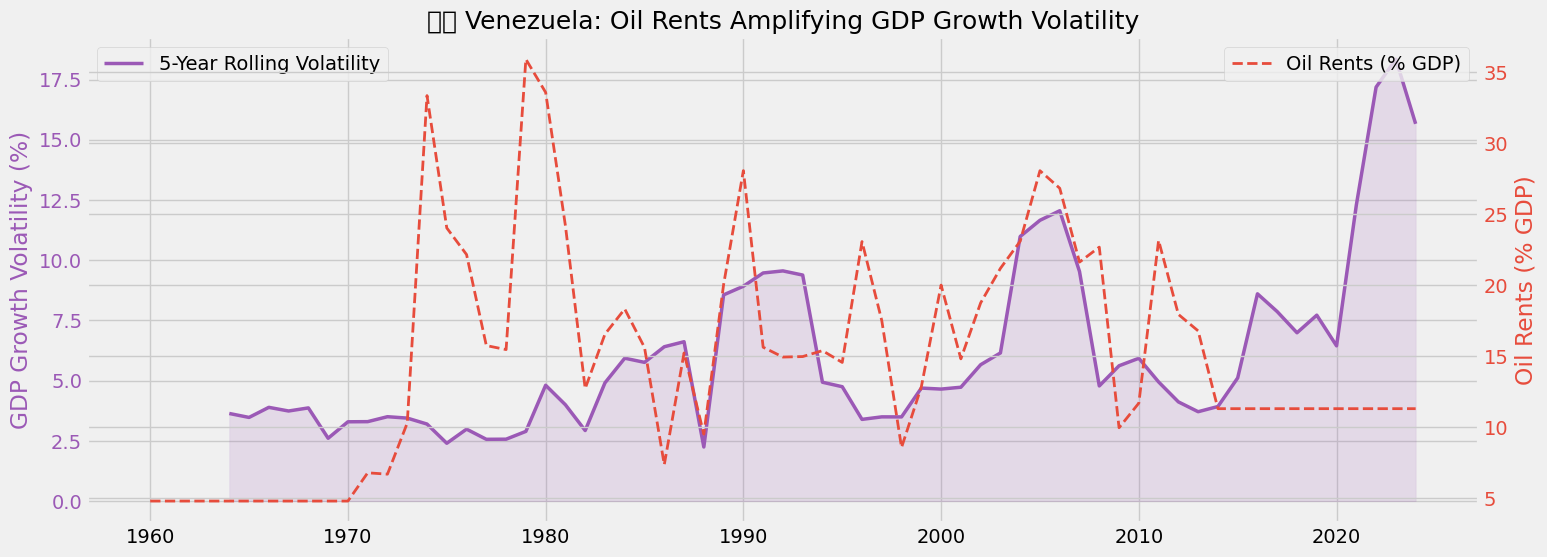

In [18]:
df_clean['volatility_5y'] = df_clean['gdp_growth_pct'].rolling(window=5).std()

fig, ax1 = plt.subplots(figsize=(16,6))

# Volatility
ax1.plot(df_clean['year'], df_clean['volatility_5y'], color='#9b59b6', lw=2.5, label='5-Year Rolling Volatility')
ax1.fill_between(df_clean['year'], df_clean['volatility_5y'], color='#9b59b6', alpha=0.15)
ax1.set_ylabel("GDP Growth Volatility (%)", color='#9b59b6')
ax1.tick_params(axis='y', labelcolor='#9b59b6')

# Oil rents
ax2 = ax1.twinx()
ax2.plot(df_clean['year'], df_clean['oil_rents_pct_gdp'], color='#e74c3c', lw=2, linestyle='--', label='Oil Rents (% GDP)')
ax2.set_ylabel("Oil Rents (% GDP)", color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title("🇻🇪 Venezuela: Oil Rents Amplifying GDP Growth Volatility", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# **4️⃣ Dutch Disease in Export Structure**

### **1️⃣ Fuel vs Ores & Metals Exports (Line Plot)**

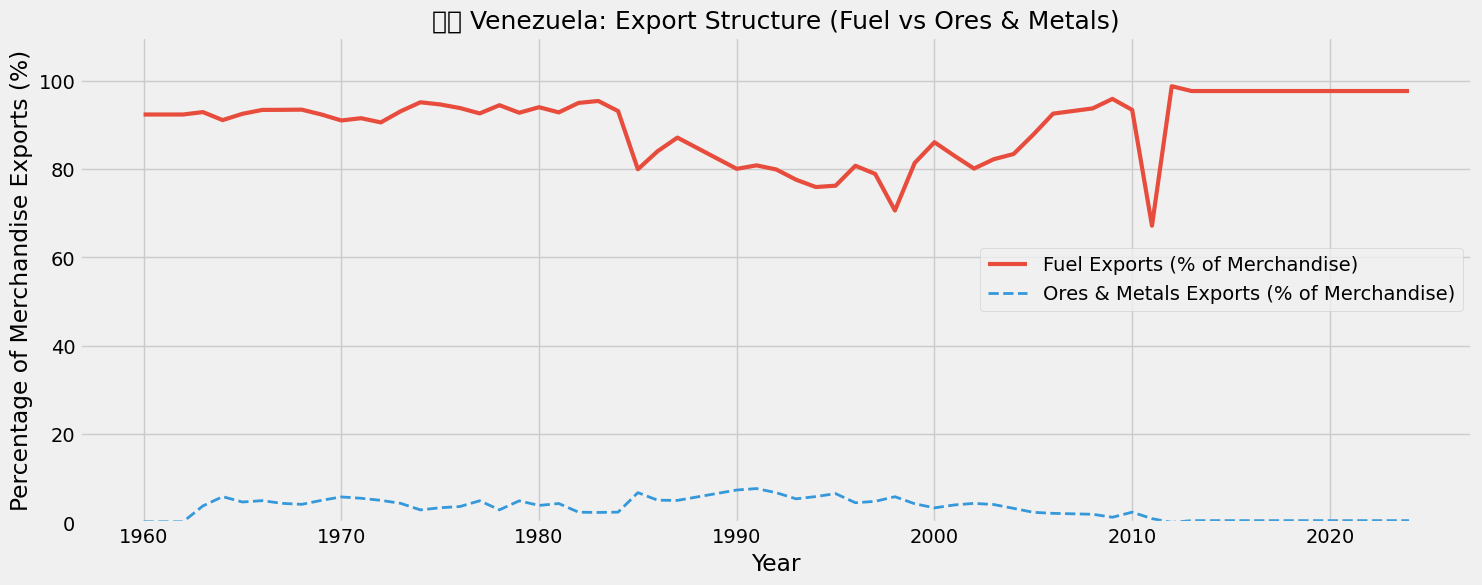

In [19]:
plt.plot(df_clean['year'], df_clean['fuel_exports_pct_merch_exports'], color='#e74c3c', lw=3, label='Fuel Exports (% of Merchandise)')
plt.plot(df_clean['year'], df_clean['ores_and_metals_exports_pct_merch_exports'], color='#3498db', lw=2, linestyle='--', label='Ores & Metals Exports (% of Merchandise)')

plt.title("🇻🇪 Venezuela: Export Structure (Fuel vs Ores & Metals)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Percentage of Merchandise Exports (%)")
plt.ylim(0, 110)
plt.legend()
plt.show()


### **2️⃣ Fuel vs Ores & Metals (Dual-Axis)**

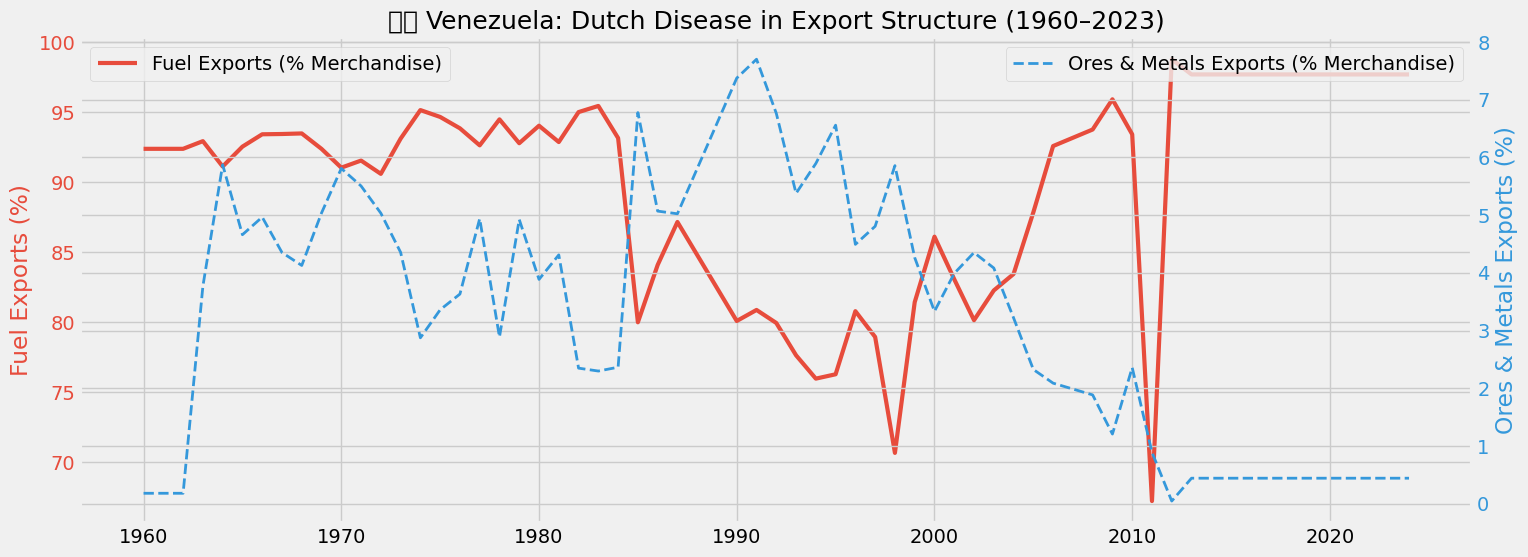

In [20]:
fig, ax1 = plt.subplots(figsize=(16,6))

# Fuel exports
ax1.plot(df_clean['year'], df_clean['fuel_exports_pct_merch_exports'], color='#e74c3c', lw=3, label='Fuel Exports (% Merchandise)')
ax1.set_ylabel('Fuel Exports (%)', color='#e74c3c')
ax1.tick_params(axis='y', labelcolor='#e74c3c')

# Ores & metals exports
ax2 = ax1.twinx()
ax2.plot(df_clean['year'], df_clean['ores_and_metals_exports_pct_merch_exports'], color='#3498db', lw=2, linestyle='--', label='Ores & Metals Exports (% Merchandise)')
ax2.set_ylabel('Ores & Metals Exports (%)', color='#3498db')
ax2.tick_params(axis='y', labelcolor='#3498db')

plt.title("🇻🇪 Venezuela: Dutch Disease in Export Structure (1960–2023)", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# **5️⃣ Sectoral Crowding-Out Effect**

### **1️⃣ Scatter Plot (Fuel vs Ores & Metals Exports)**

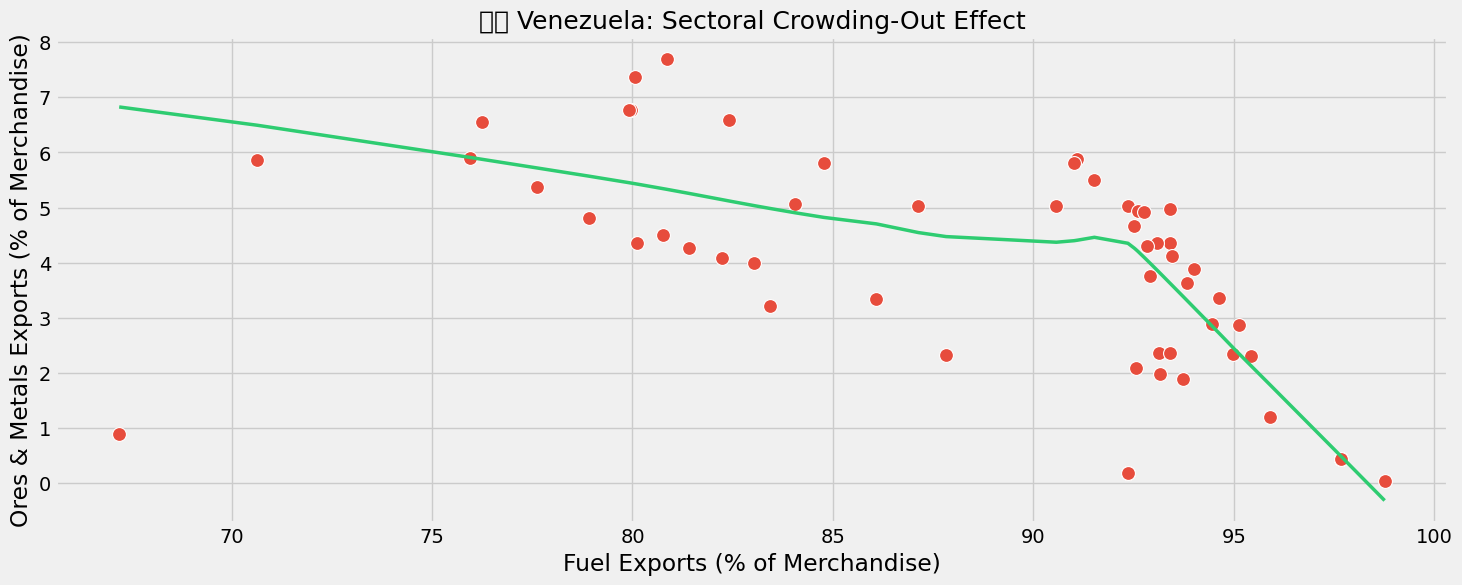

In [21]:
# Scatter plot
sns.scatterplot(
    x='fuel_exports_pct_merch_exports',
    y='ores_and_metals_exports_pct_merch_exports',
    data=df_clean,
    s=100,
    color='#e74c3c'
)

# Trend line (lowess smoothing)
sns.regplot(
    x='fuel_exports_pct_merch_exports',
    y='ores_and_metals_exports_pct_merch_exports',
    data=df_clean,
    scatter=False,
    lowess=True,
    line_kws={'color': '#2ecc71', 'linewidth': 2.5}
)

plt.title("🇻🇪 Venezuela: Sectoral Crowding-Out Effect", fontsize=18)
plt.xlabel("Fuel Exports (% of Merchandise)")
plt.ylabel("Ores & Metals Exports (% of Merchandise)")
plt.show()

### **2️⃣ Percentage Contribution of Fuel vs Ores & Metals**

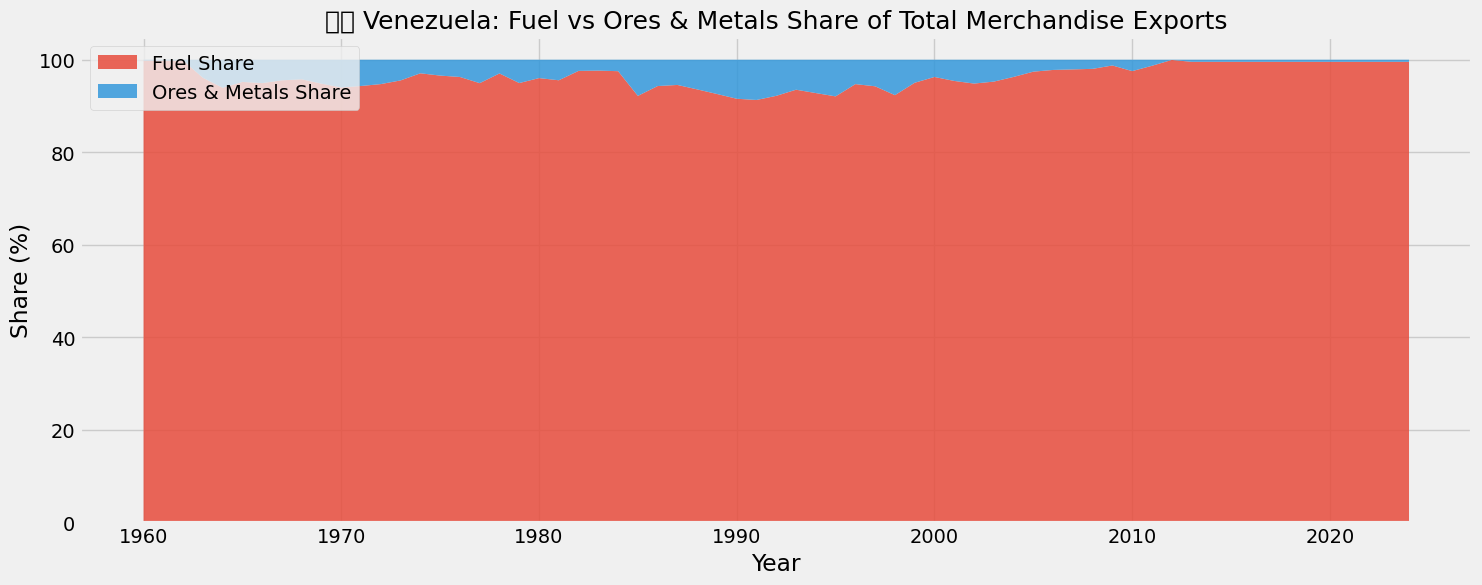

In [22]:
df_clean['total_merch_exports'] = df_clean['fuel_exports_pct_merch_exports'] + df_clean['ores_and_metals_exports_pct_merch_exports']
df_clean['fuel_share'] = df_clean['fuel_exports_pct_merch_exports'] / df_clean['total_merch_exports'] * 100
df_clean['ores_metals_share'] = df_clean['ores_and_metals_exports_pct_merch_exports'] / df_clean['total_merch_exports'] * 100

plt.figure(figsize=(16,6))
plt.stackplot(
    df_clean['year'],
    df_clean['fuel_share'],
    df_clean['ores_metals_share'],
    labels=['Fuel Share', 'Ores & Metals Share'],
    colors=['#e74c3c','#3498db'],
    alpha=0.85
)
plt.title("🇻🇪 Venezuela: Fuel vs Ores & Metals Share of Total Merchandise Exports", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.legend(loc='upper left')
plt.show()

# ** Growth Volatility & Economic Fragility**

# **6️⃣ Black Swan Growth Events**

In [23]:
# Calculate Z-score for GDP growth
df_clean['growth_z'] = zscore(df_clean['gdp_growth_pct'].dropna())

# Identify extreme events (|Z| > 2)
black_swan_events = df_clean[df_clean['growth_z'].abs() > 2]

### **1️⃣ Scatter Plot of GDP Growth with Anomalies Highlighted**

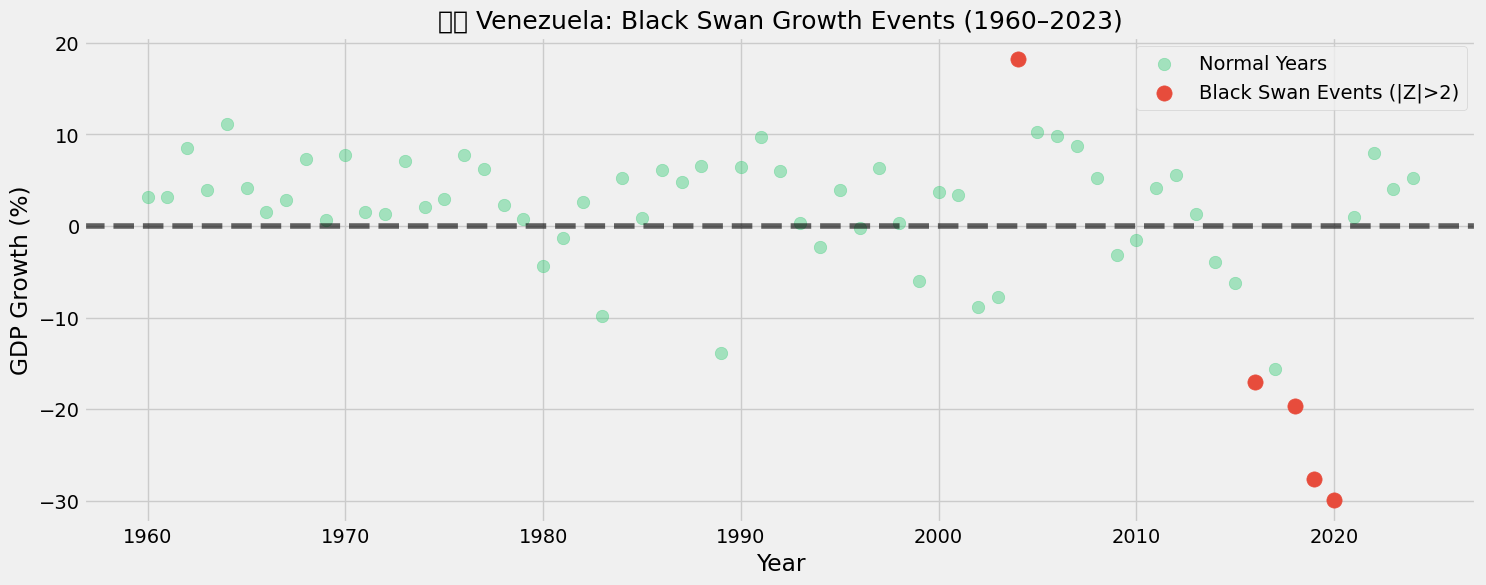

In [24]:
plt.figure(figsize=(16,6))
plt.scatter(df_clean['year'], df_clean['gdp_growth_pct'], alpha=0.4, label='Normal Years', color='#2ecc71', s=80)
plt.scatter(black_swan_events['year'], black_swan_events['gdp_growth_pct'], color='#e74c3c', s=120, label='Black Swan Events (|Z|>2)')

plt.axhline(0, color='black', linestyle='--', alpha=0.6)
plt.title("🇻🇪 Venezuela: Black Swan Growth Events (1960–2023)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.show()

### **2️⃣ Bar Plot of Black Swan Events (Magnitude)**

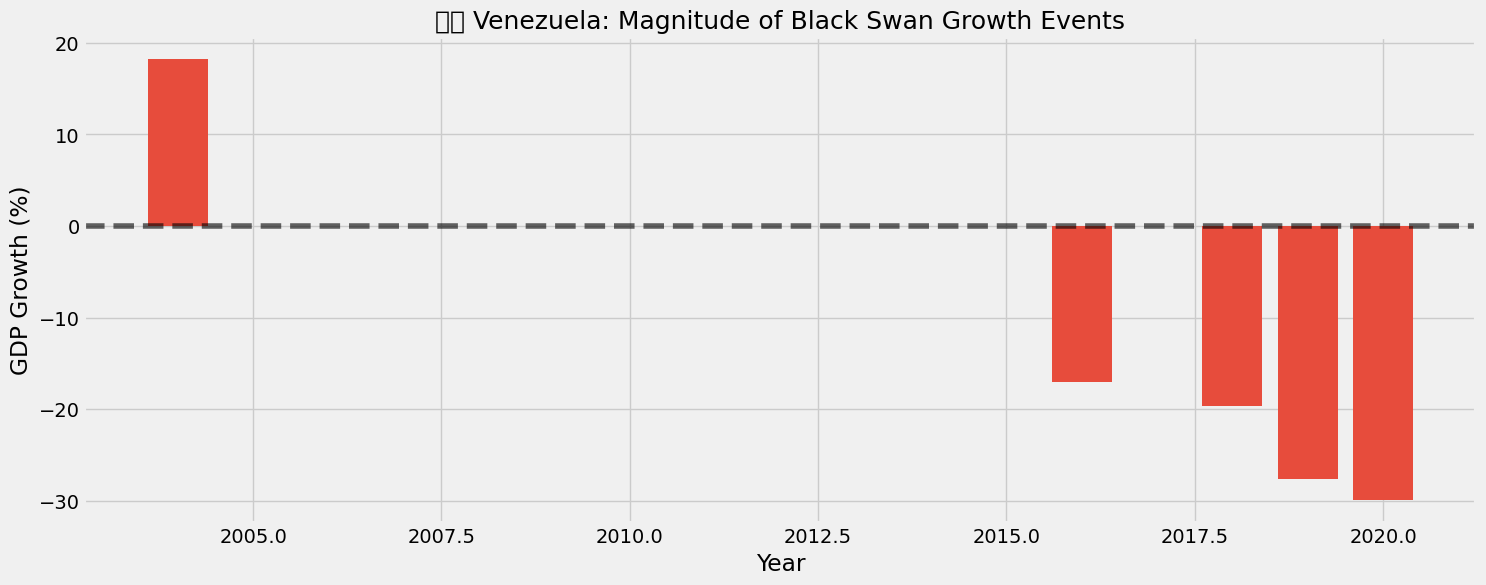

In [25]:
plt.figure(figsize=(16,6))
plt.bar(black_swan_events['year'], black_swan_events['gdp_growth_pct'], color='#e74c3c')
plt.axhline(0, color='black', linestyle='--', alpha=0.6)
plt.title("🇻🇪 Venezuela: Magnitude of Black Swan Growth Events", fontsize=18)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.show()

### **3️⃣ Timeline with Oil Rents Overlay (Dual-Axis)**

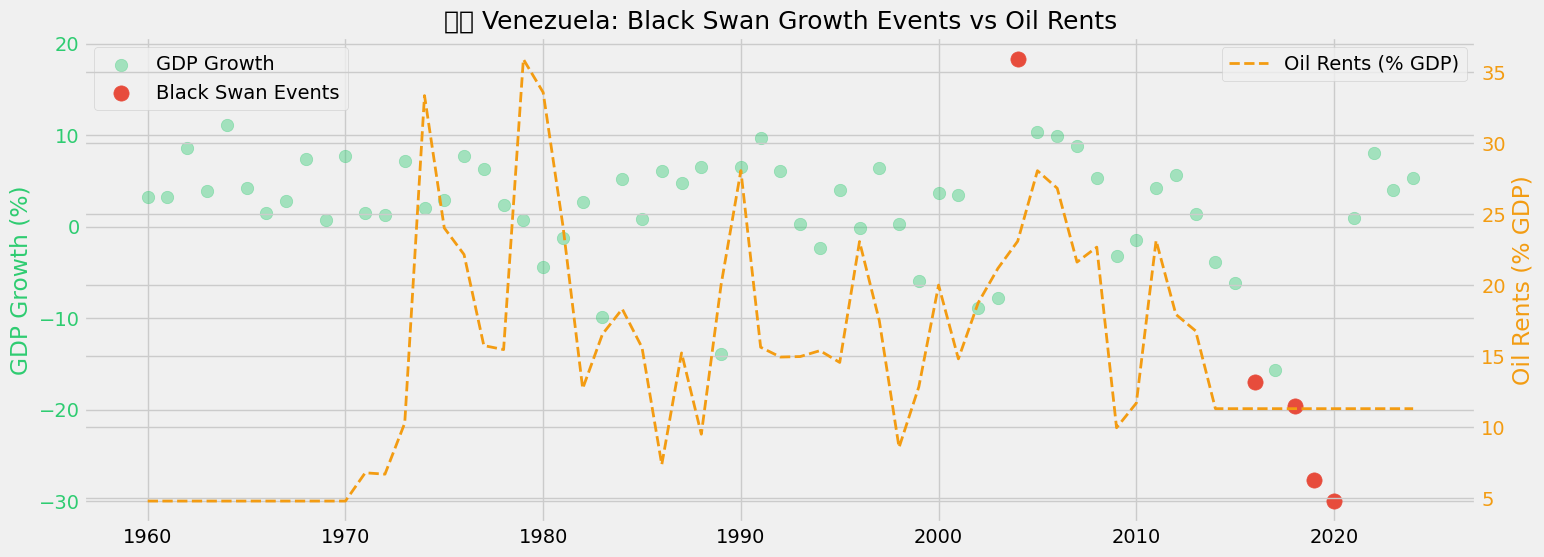

In [26]:
fig, ax1 = plt.subplots(figsize=(16,6))

# GDP Growth
ax1.scatter(df_clean['year'], df_clean['gdp_growth_pct'], alpha=0.4, color='#2ecc71', s=80, label='GDP Growth')
ax1.scatter(black_swan_events['year'], black_swan_events['gdp_growth_pct'], color='#e74c3c', s=120, label='Black Swan Events')
ax1.set_ylabel("GDP Growth (%)", color='#2ecc71')
ax1.tick_params(axis='y', labelcolor='#2ecc71')

# Oil rents
ax2 = ax1.twinx()
ax2.plot(df_clean['year'], df_clean['oil_rents_pct_gdp'], color='#f39c12', lw=2, linestyle='--', label='Oil Rents (% GDP)')
ax2.set_ylabel("Oil Rents (% GDP)", color='#f39c12')
ax2.tick_params(axis='y', labelcolor='#f39c12')

plt.title("🇻🇪 Venezuela: Black Swan Growth Events vs Oil Rents", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# **7️⃣ Decadal Structural Shifts**

### **Aggregate Data by Decade**

In [27]:
# Assign decade
df_clean['decade'] = (df_clean['year'] // 10) * 10

# Aggregate mean GDP growth and oil rents per decade
decade_agg = df_clean.groupby('decade')[['gdp_growth_pct', 'oil_rents_pct_gdp']].mean().reset_index()

### **1️⃣ Side-by-Side Bar Plot (Average GDP Growth vs Oil Rents)**

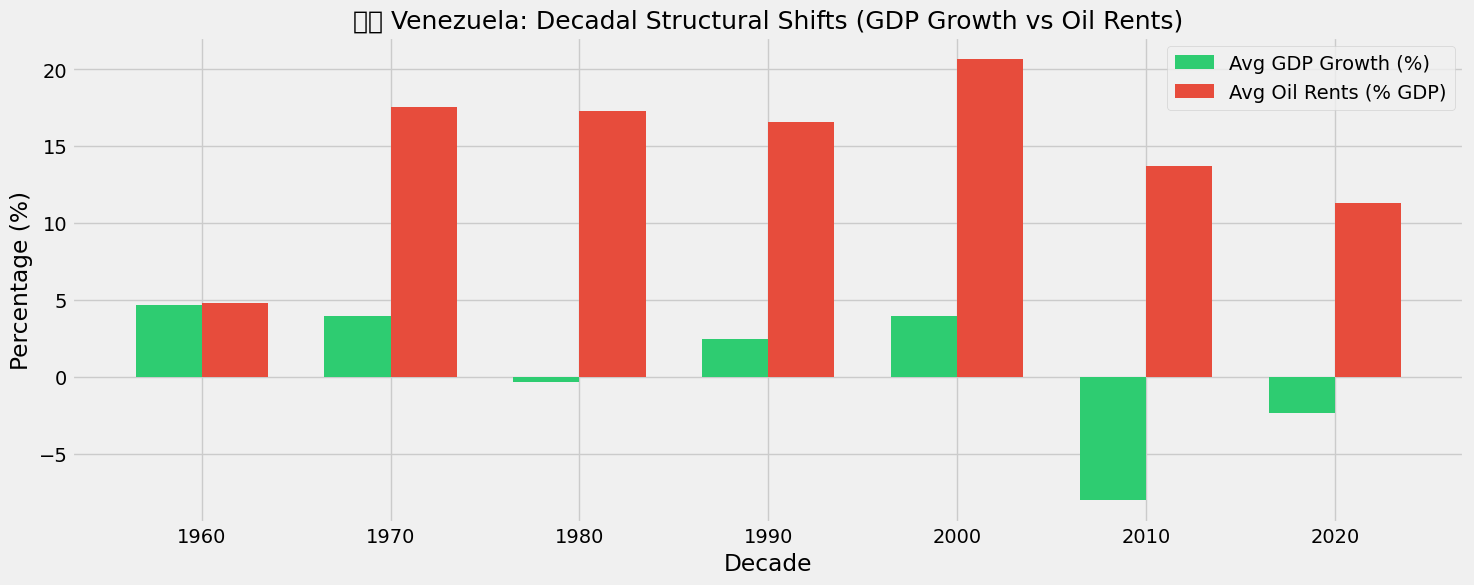

In [28]:
x = np.arange(len(decade_agg['decade']))
width = 0.35

plt.figure(figsize=(16,6))
plt.bar(x - width/2, decade_agg['gdp_growth_pct'], width, color='#2ecc71', label='Avg GDP Growth (%)')
plt.bar(x + width/2, decade_agg['oil_rents_pct_gdp'], width, color='#e74c3c', label='Avg Oil Rents (% GDP)')

plt.xticks(x, decade_agg['decade'])
plt.xlabel("Decade")
plt.ylabel("Percentage (%)")
plt.title("🇻🇪 Venezuela: Decadal Structural Shifts (GDP Growth vs Oil Rents)", fontsize=18)
plt.legend()
plt.show()

### **2️⃣ Line Plot with Dual-Axis (Trend Over Decades)**

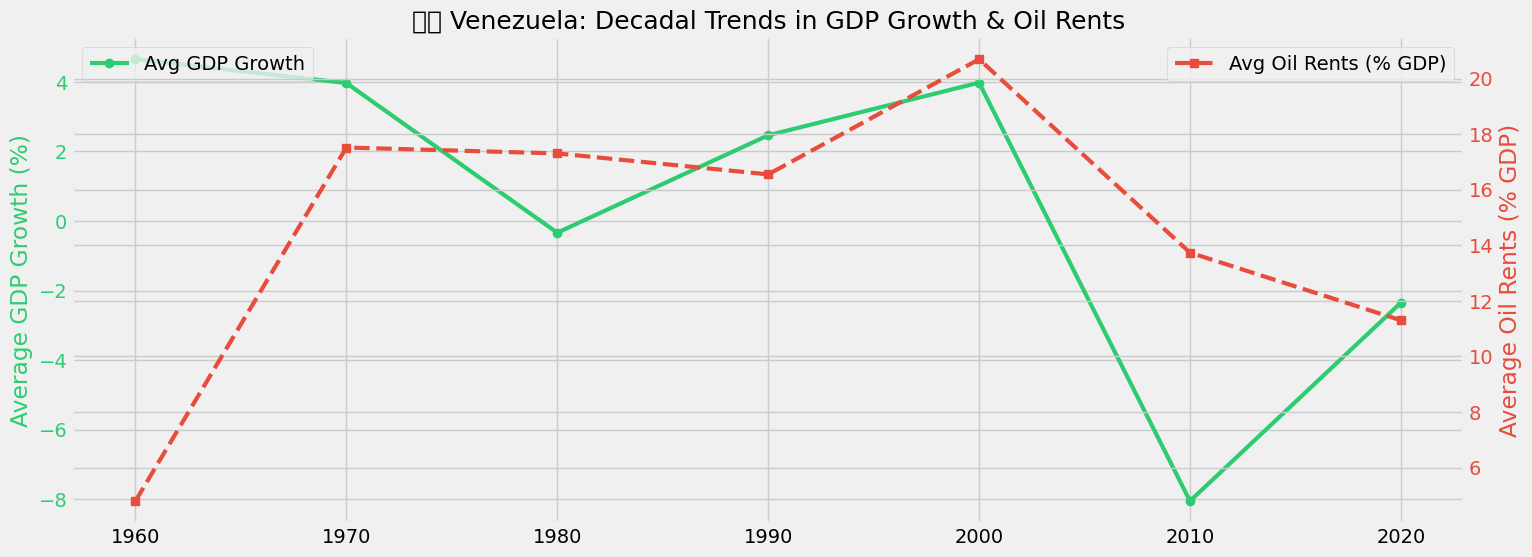

In [29]:
fig, ax1 = plt.subplots(figsize=(16,6))

# GDP growth
ax1.plot(decade_agg['decade'], decade_agg['gdp_growth_pct'], color='#2ecc71', lw=3, marker='o', label='Avg GDP Growth')
ax1.set_ylabel("Average GDP Growth (%)", color='#2ecc71')
ax1.tick_params(axis='y', labelcolor='#2ecc71')

# Oil rents
ax2 = ax1.twinx()
ax2.plot(decade_agg['decade'], decade_agg['oil_rents_pct_gdp'], color='#e74c3c', lw=3, marker='s', linestyle='--', label='Avg Oil Rents (% GDP)')
ax2.set_ylabel("Average Oil Rents (% GDP)", color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title("🇻🇪 Venezuela: Decadal Trends in GDP Growth & Oil Rents", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### **3️⃣ Heatmap of Decadal Growth vs Oil Rents**

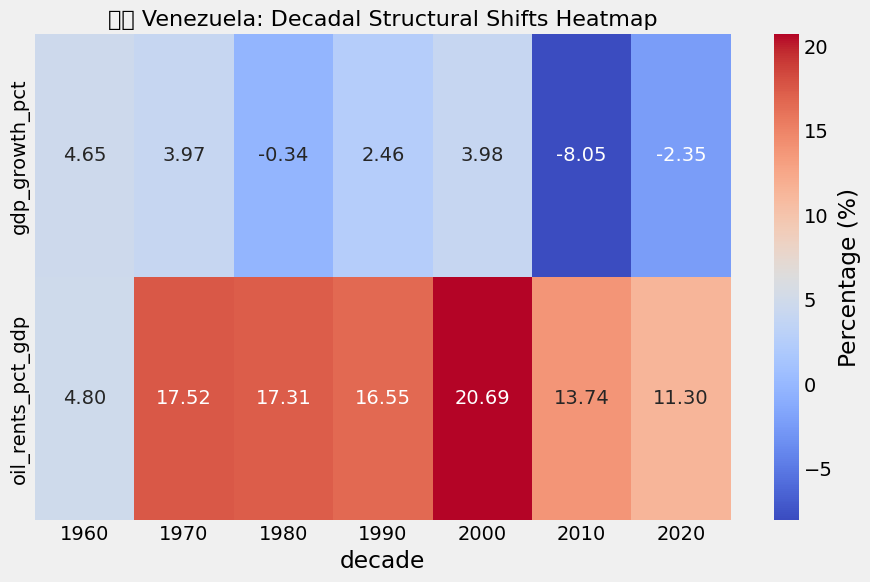

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(decade_agg.set_index('decade').T, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Percentage (%)'})
plt.title("🇻🇪 Venezuela: Decadal Structural Shifts Heatmap", fontsize=16)
plt.show()

# **8️⃣ Weak Correlation Between Oil Wealth and Growth**

### **1️⃣ Correlation Matrix**

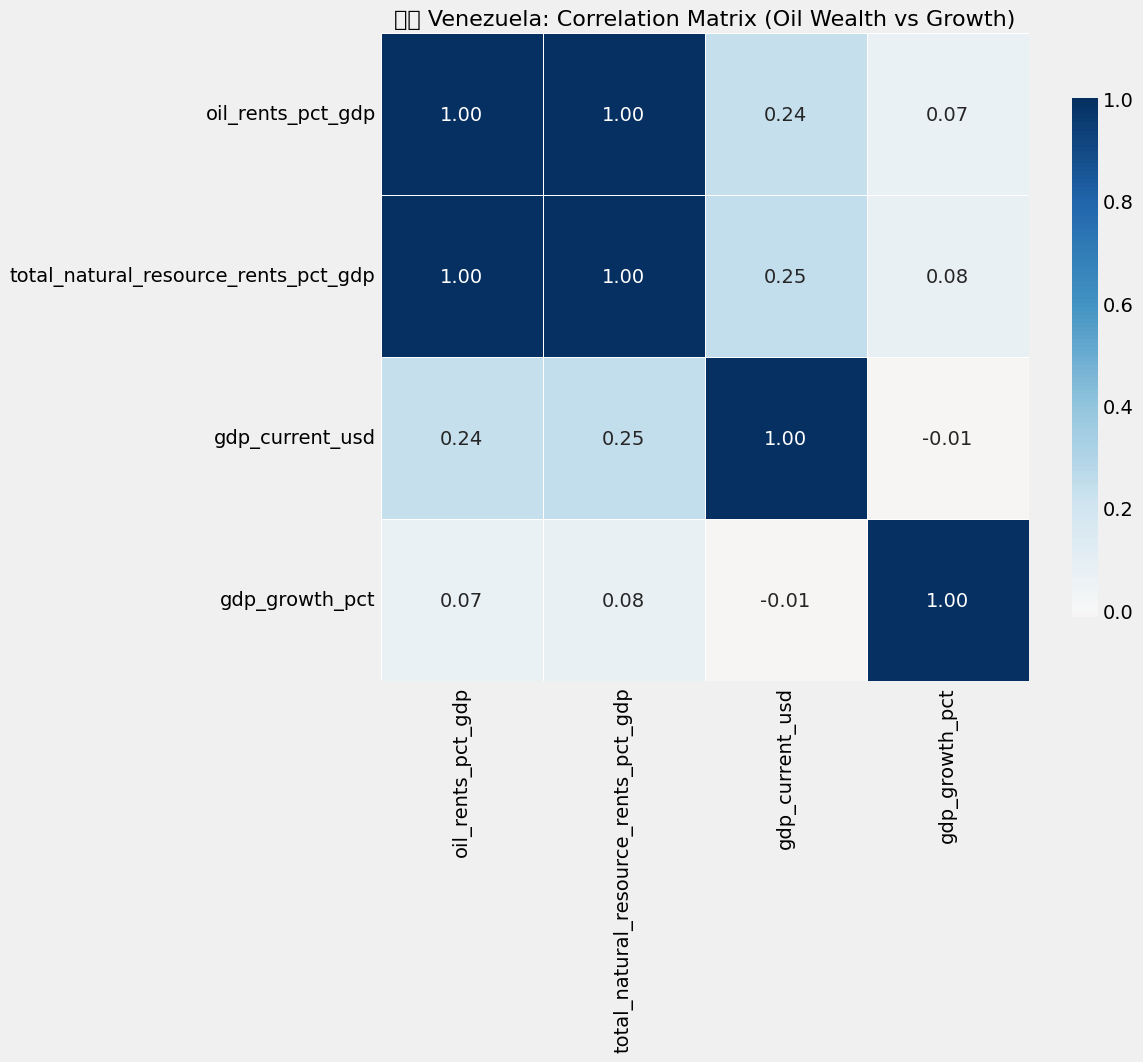

In [31]:
# Select relevant numeric columns
num_cols = ['oil_rents_pct_gdp', 'total_natural_resource_rents_pct_gdp', 'gdp_current_usd', 'gdp_growth_pct']

# Compute correlation
corr_matrix = df_clean[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu', center=0, square=True, linewidths=0.5, cbar_kws={'shrink':0.8})
plt.title("🇻🇪 Venezuela: Correlation Matrix (Oil Wealth vs Growth)", fontsize=16)
plt.show()

### **2️⃣ Pairplot (All Economic Variables)**

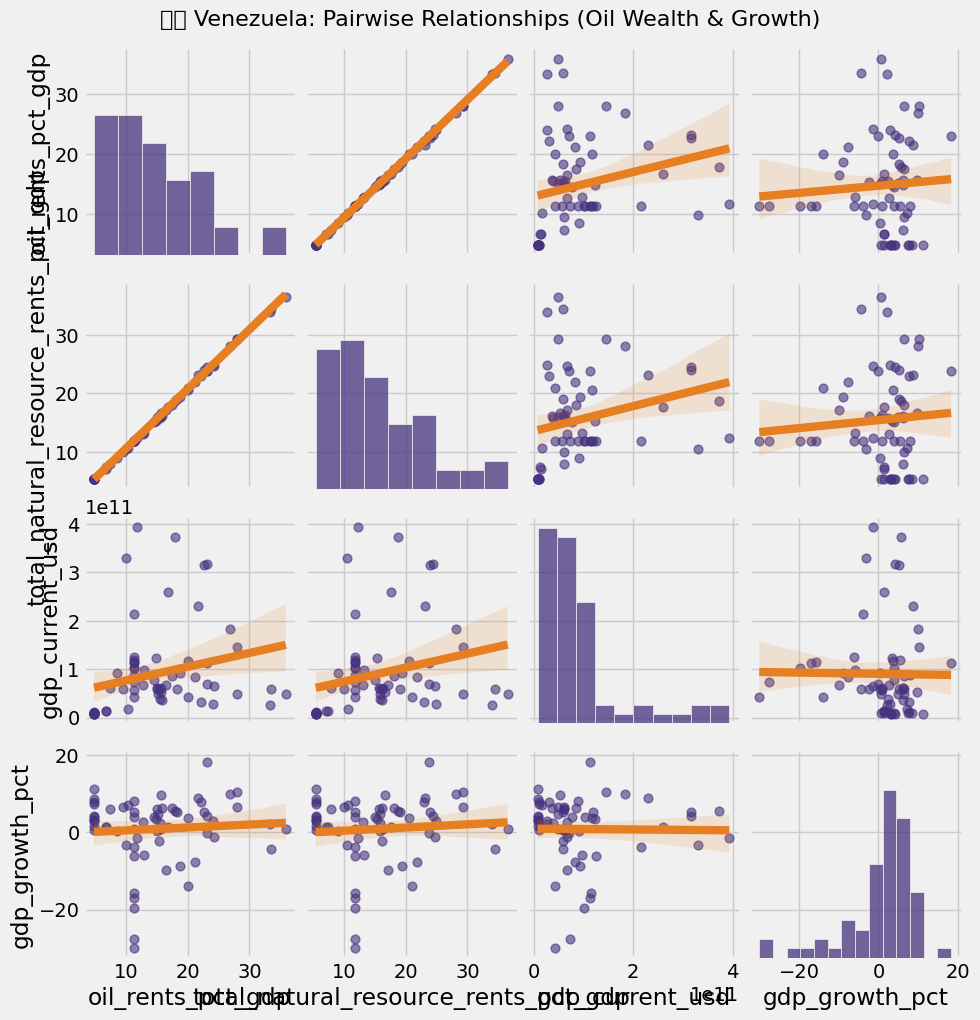

In [32]:
sns.pairplot(df_clean[num_cols], kind='reg', plot_kws={'scatter_kws': {'s':40, 'alpha':0.6}, 'line_kws': {'color':'#e67e22'}})
plt.suptitle("🇻🇪 Venezuela: Pairwise Relationships (Oil Wealth & Growth)", y=1.02, fontsize=16)
plt.show()

# **9️⃣ GDP Size vs Growth Illusion**

### **1️⃣ GDP Size vs GDP Growth (Dual-Axis Line Plot)**

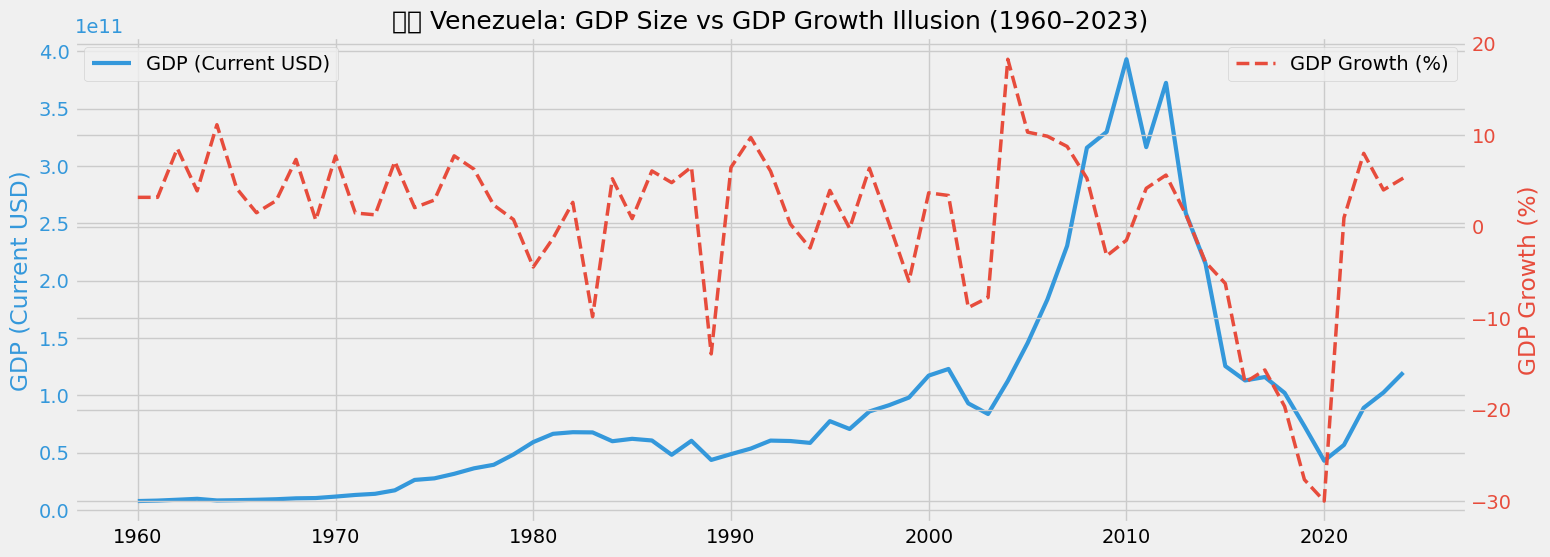

In [33]:
fig, ax1 = plt.subplots(figsize=(16,6))

# Plot GDP size
ax1.plot(df_clean['year'], df_clean['gdp_current_usd'], color='#3498db', lw=3, label='GDP (Current USD)')
ax1.set_ylabel("GDP (Current USD)", color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')

# Plot GDP growth on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_clean['year'], df_clean['gdp_growth_pct'], color='#e74c3c', lw=2.5, linestyle='--', label='GDP Growth (%)')
ax2.set_ylabel("GDP Growth (%)", color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title("🇻🇪 Venezuela: GDP Size vs GDP Growth Illusion (1960–2023)", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### **2️⃣ Rolling Average of GDP Growth vs GDP**

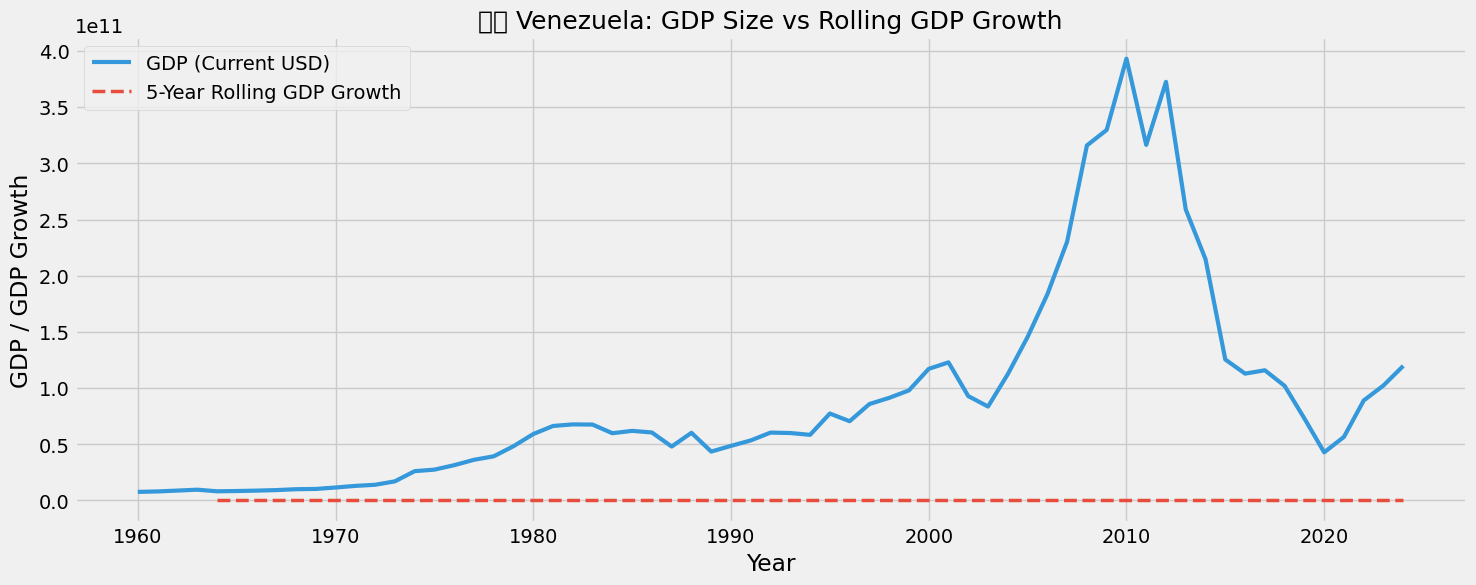

In [34]:
# Rolling 5-year mean for GDP growth
df_clean['gdp_growth_rolling'] = df_clean['gdp_growth_pct'].rolling(window=5).mean()

plt.figure(figsize=(16,6))
plt.plot(df_clean['year'], df_clean['gdp_current_usd'], color='#3498db', lw=3, label='GDP (Current USD)')
plt.plot(df_clean['year'], df_clean['gdp_growth_rolling'], color='#e74c3c', lw=2.5, linestyle='--', label='5-Year Rolling GDP Growth')

plt.title("🇻🇪 Venezuela: GDP Size vs Rolling GDP Growth", fontsize=18)
plt.xlabel("Year")
plt.ylabel("GDP / GDP Growth")
plt.legend()
plt.show()

# **🔟 Data Quality & Reporting Gaps**

### **1️⃣ Create a Missingness Matrix**

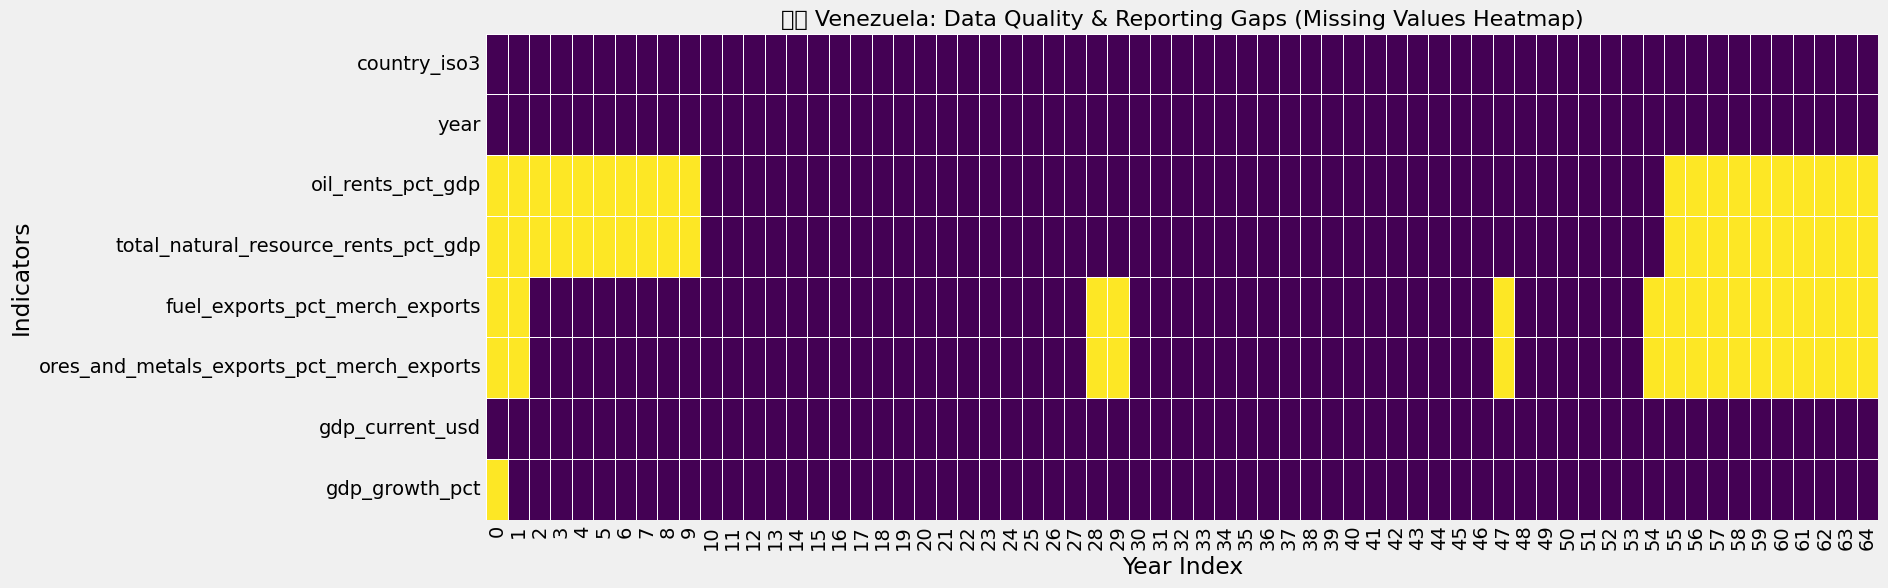

In [35]:
# Check missing values before interpolation
missing_before = df.isnull()

plt.figure(figsize=(16,6))
sns.heatmap(missing_before.T, cbar=False, cmap='viridis', linewidths=0.5)
plt.title("🇻🇪 Venezuela: Data Quality & Reporting Gaps (Missing Values Heatmap)", fontsize=16)
plt.xlabel("Year Index")
plt.ylabel("Indicators")
plt.show()


### **2️⃣ Missing Values Count per Column**

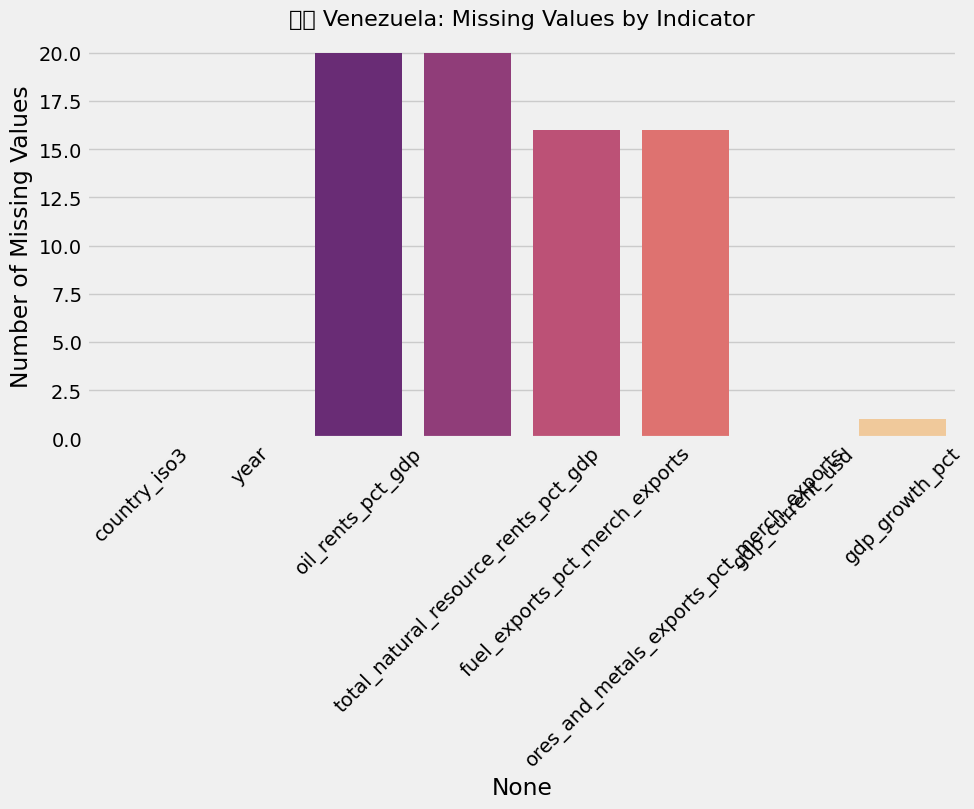

In [36]:
missing_counts = df.isnull().sum()

plt.figure(figsize=(10,5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Number of Missing Values")
plt.title("🇻🇪 Venezuela: Missing Values by Indicator", fontsize=16)
plt.show()

### **3️⃣ Missing Values Over Time (Line Plot)**

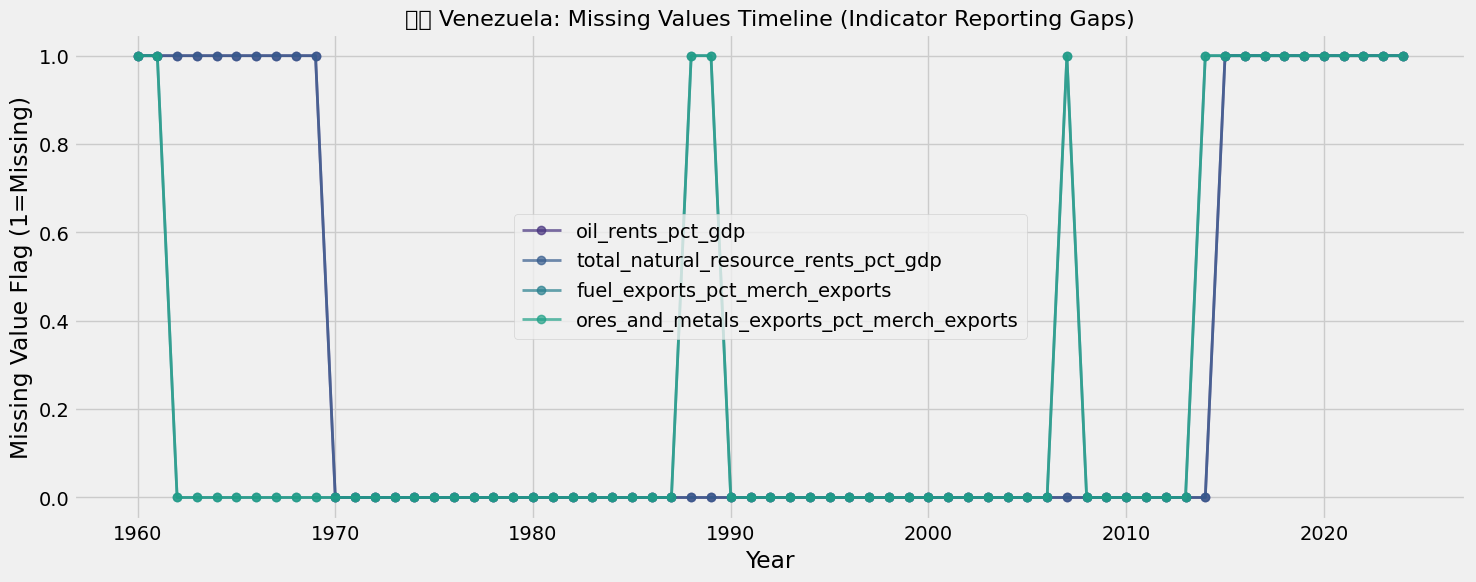

In [37]:
plt.figure(figsize=(16,6))

for col in ['oil_rents_pct_gdp', 'total_natural_resource_rents_pct_gdp', 'fuel_exports_pct_merch_exports', 'ores_and_metals_exports_pct_merch_exports']:
    plt.plot(df['year'], df[col].isnull().astype(int), marker='o', lw=2, alpha=0.7, label=col)

plt.title("🇻🇪 Venezuela: Missing Values Timeline (Indicator Reporting Gaps)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Missing Value Flag (1=Missing)")
plt.legend()
plt.show()

---

#  **Thank You!** 

Thank you for exploring this analysis of **Venezuela's economic trajectory** with me.  

I hope this notebook provided **insightful visualizations, meaningful patterns, and a deeper understanding** of how natural resource dependency shapes macroeconomic outcomes.  

💡 **Key takeaway:** Sustainable growth requires **diversification, institutional resilience, and careful resource management**.  

Feel free to **comment, share your thoughts, or reach out** for discussions on data analysis, economic modeling, or visualization techniques.  

🌟 Happy analyzing and keep exploring the world of data! 📊🚀
